In [1]:
%matplotlib inline
import numpy as np
import pylab as pl
import scipy.special as special
from scipy.integrate import quad
from scipy.integrate import nquad

# Set plot parameters to make beautiful plots
pl.rcParams['figure.figsize']  = 12, 7.5
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 20  
pl.rcParams['font.sans-serif'] = 'serif'
#pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'medium'
pl.rcParams['axes.labelsize']  = 'medium'

pl.rcParams['xtick.major.size'] = 8     
pl.rcParams['xtick.minor.size'] = 4     
pl.rcParams['xtick.major.pad']  = 8     
pl.rcParams['xtick.minor.pad']  = 8     
pl.rcParams['xtick.color']      = 'k'     
pl.rcParams['xtick.labelsize']  = 'medium'
pl.rcParams['xtick.direction']  = 'in'    

pl.rcParams['ytick.major.size'] = 8     
pl.rcParams['ytick.minor.size'] = 4     
pl.rcParams['ytick.major.pad']  = 8     
pl.rcParams['ytick.minor.pad']  = 8     
pl.rcParams['ytick.color']      = 'k'     
pl.rcParams['ytick.labelsize']  = 'medium'
pl.rcParams['ytick.direction']  = 'in'    

In [117]:
#want to plot the integrand in Eq. 60 of the paper
#with filled in values of I(...), delta(yn), 

#constants in natural units
#m = 1.
#c = 1.
theta_e = 10.
#nu_c = 1
#B = 10.
#e = 1


#constants in Gaussian cgs units (values from harmony)
m = 9.1093826e-28
c = 2.99792458e10
e = 4.80320680e-10
B = 30.0
#n_e = 100000.



#variables to be set (frequency, observer angle, width of delta function, electron number density, 
# sum index n)


theta = np.pi/3.
epsilon = 0.01
n_e = 1
nu_c = e * B / (2. * np.pi * m * c)
nu = 100000 * nu_c
nu_s = (2./9.) * nu_c * theta_e**2 * np.sin(theta)
n_e_nt = 1.
#p_PL = 2.2
p_PL = 3.
gamma_50_min = 1.
gamma_50_max = 1000.
#gamma_50_max = 100.
C = 1.
n_dn = (nu / nu_c) * abs(np.sin(theta))
Index_cutoff = 0.001
gamma_cutoff = 1000.
kappa = 150




In [118]:
def K_I(n, gamma):
    beta = np.sqrt(1. - 1./gamma**2.)
    cos_xi = (gamma * nu - n * nu_c) / (gamma * nu * beta * np.cos(theta))
    M = (np.cos(theta) - beta * cos_xi)/np.sin(theta)
    N = beta * np.sqrt(1. - cos_xi**2)
    z = (nu * gamma * beta * np.sin(theta) * np.sqrt(1. - cos_xi**2))/nu_c
    K_xx = M**2 * (special.jv(n, z))**2
    K_yy = N**2 * (special.jvp(n, z, 1))**2
    ans = K_xx + K_yy
    return ans

def K_Q(n, gamma):
    beta = np.sqrt(1. - 1./gamma**2.)
    cos_xi = (gamma * nu - n * nu_c) / (gamma * nu * beta * np.cos(theta))
    M = (np.cos(theta) - beta * cos_xi)/np.sin(theta)
    N = beta * np.sqrt(1. - cos_xi**2)
    z = (nu * gamma * beta * np.sin(theta) * np.sqrt(1. - cos_xi**2))/nu_c
    K_xx = M**2 * (special.jv(n, z))**2
    K_yy = N**2 * (special.jvp(n, z, 1))**2
    ans = K_xx - K_yy
    return ans

def K_U(n, gamma):
    a = 0
    return a

def K_V(n, gamma):  
    beta = np.sqrt(1. - 1./gamma**2.)  
    cos_xi = (gamma * nu - n * nu_c) / (gamma * nu * beta * np.cos(theta))
    z = (nu * gamma * beta * np.sin(theta) * np.sqrt(1. - cos_xi**2))/nu_c
    M = (np.cos(theta) - beta * cos_xi)/np.sin(theta)
    N = beta * np.sqrt(1. - cos_xi**2)
    ans = - 2. * M * N * special.jv(n, z) * special.jvp(n, z, 1)
    return ans


def gamma_up_limit(n):
    gamma_up_nume = (n * nu_c /nu) + np.absolute(np.cos(theta)) * np.sqrt((n * nu_c /nu)**2 - (np.sin(theta))**2)
    gamma_deno = (np.sin(theta))**2
    gamma_up = gamma_up_nume / gamma_deno
    return gamma_up

def gamma_dn_limit(n):
    gamma_dn_nume = (n * nu_c /nu) - np.absolute(np.cos(theta)) * np.sqrt((n * nu_c /nu)**2 - (np.sin(theta))**2)
    gamma_deno = (np.sin(theta))**2
    gamma_dn = gamma_dn_nume / gamma_deno
    return gamma_dn

def kappa_body_with_cutoff_no_norm(gamma):
    beta = np.sqrt(1. - 1./gamma**2.)    
    prefactor = 4. * np.pi * m**3 * c**3 * gamma**2 * beta
    body = (1. + (gamma - 1.)/(kappa * theta_e))**(- kappa - 1.) * np.exp(- gamma/gamma_cutoff)
    f = prefactor * body
    return f

kappa_normalized_value = quad(kappa_body_with_cutoff_no_norm, 1., np.inf, epsabs = 0, epsrel = 1e-8)[0]
#print (1./kappa_normalized_value) * 4. * np.pi**2 * nu * m**2 * c

#def kappa_with_normalized_with_cutoff(gamma):
#    f = (1./kappa_normalized_value) * kappa_body_with_cutoff_no_norm(gamma)
#    return f

def Operator_D_gamma(gamma):
    prefactor = (1. /  kappa_normalized_value) * 4. * np.pi**2 * nu * m**2 * c
    body_1 = ((- kappa - 1.) / (kappa * theta_e)) * (1. + (gamma - 1.)/(kappa * theta_e))**(- kappa - 2.)
    body_2 = (1. + (gamma - 1.)/(kappa * theta_e))**(- kappa - 1.) * (- 1./gamma_cutoff)
    f = prefactor * (body_1 + body_2) * np.exp(- gamma/gamma_cutoff)
    return f

def absorptivity_integrand_62(n, gamma):
    
    beta = np.sqrt(1. - 1./gamma**2.)
    cos_xi = (gamma * nu - n_e * nu_c) / (gamma * nu * beta * np.cos(theta))
    
#    normalization = 1. / power_law_tail_normalized_value
    prefactor = - c * e**2 / (2. * nu)
    body_1 = gamma**2 * beta
    body_2 = Operator_D_gamma(gamma) * K_I(n, gamma)
    f =  prefactor * body_1 * body_2 * 1./(nu * beta * abs(np.cos(theta)))
    
    return f



def anu_n_integral_62_one(n):
    
#    def jnu_integrand_in_eq62_gamma(gamma):
#        jnu_integrand_62 = jnu_integrand_in_eq62(gamma, n)
#        return jnu_integrand_62
    
    def anu_integrand_in_eq62_gamma_with_cutoff(gamma):
        anu_integrand_62_cutoff = absorptivity_integrand_62(n, gamma)
        return anu_integrand_62_cutoff
    
        
    ans_once = quad(anu_integrand_in_eq62_gamma_with_cutoff, gamma_dn_limit(n), gamma_up_limit(n), epsabs = 0, epsrel = 1e-8)[0]
    
    return ans_once

#def jnu_nonthermal_power_law():
#    ans = 0
#    for i in range(int(n_dn + 1.), int(n_dn + 100000.)):
#        ans = ans + jnu_n_integral_62_one(i)
#    return ans

n_peak = 6000000000

def anu_62_integral_from_n_max_to_n_limit(n_max, n_dn):
    
    if(n_max < n_dn):
        n_max = n_dn
    
    ans = quad(anu_n_integral_62_one, n_max, C * n_peak, epsabs = 0, epsrel = 1e-8)[0]
    
    return ans
    

def anu_62_sum_to_n_max_integral_to_n_limit(n_max_sum):
    ans = 0
    for i in range(int(n_dn + 1.), int(1 + n_dn + n_max_sum)):
        ans = ans + anu_n_integral_62_one(i)
#        print ans
        
    total = ans + anu_62_integral_from_n_max_to_n_limit(n_max_sum, n_dn)
    return total





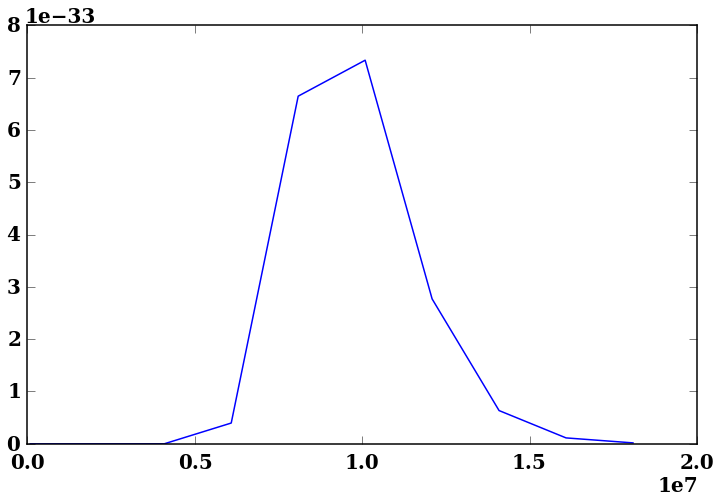

In [119]:
x_value = []
y_value = []
n_max_here = 20000000

step = int((int(n_max_here))/10.)


for i in xrange(int(n_dn + 1.), int(n_dn + 1. + n_max_here), step):
    x_value = x_value + [i]
    y_value = y_value + [anu_n_integral_62_one(i)]

#    print int(n_dn + 1.), x_value
pl.plot(x_value, y_value)
#pl.ylim([-5, 0])
#print x_value, int(n_dn+1) 
#pl.xlim([0,4000])

In [59]:
n_max = 1000
print anu_62_sum_to_n_max_integral_to_n_limit(n_max)

6.04818976561e-73


/Users/zbrawei/anaconda/lib/python2.7/site-packages/scipy/integrate/quadpack.py:352: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


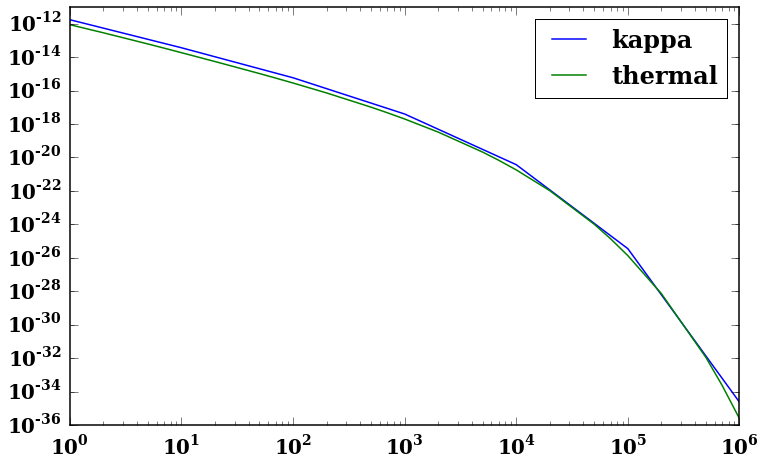

In [77]:
data_kappa = np.loadtxt('/Users/zbrawei/Documents/summer_new/my_data_1/kappa_anu_150_cut1000_p3_w_norm.txt')
data_thermal = np.loadtxt('/Users/zbrawei/Documents/summer_new/my_data_1/thermal_anu_K_I.txt')
pl.loglog(data_kappa[:, 0], data_kappa[:, 1], label = 'kappa')
pl.loglog(data_thermal[:, 0], data_thermal[:, 1], label = 'thermal')
pl.legend()
pl.show()